In [1]:
import numpy as np
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
lead_data=pd.read_csv('machine learning data/leads.csv')

In [4]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_data.shape


(9240, 37)

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data=lead_data.replace('Select',np.nan)

In [8]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
cols=lead_data.columns
for i in cols:
    if((100*(lead_data[i].isnull().sum()/len(lead_data.index)))>=45):
        lead_data.drop(i,1,inplace=True)

In [11]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

**categorical attribute analysis**

In [12]:
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Italy                      2
China                      2
Philippines                2
Belgium                    2
Bangladesh                 2
Ghana                      2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Sri Lanka                  1
Vietnam                    1
Kenya                      1
Switzerland                1
Russia                     1
Denmark       

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

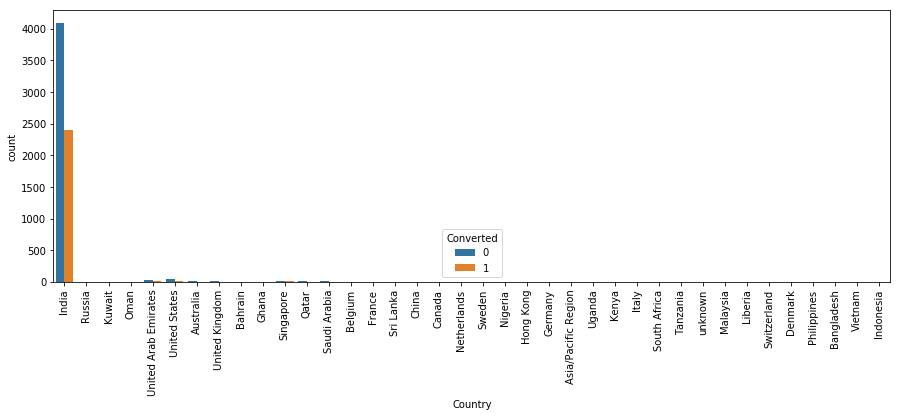

In [14]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Country, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [15]:
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')

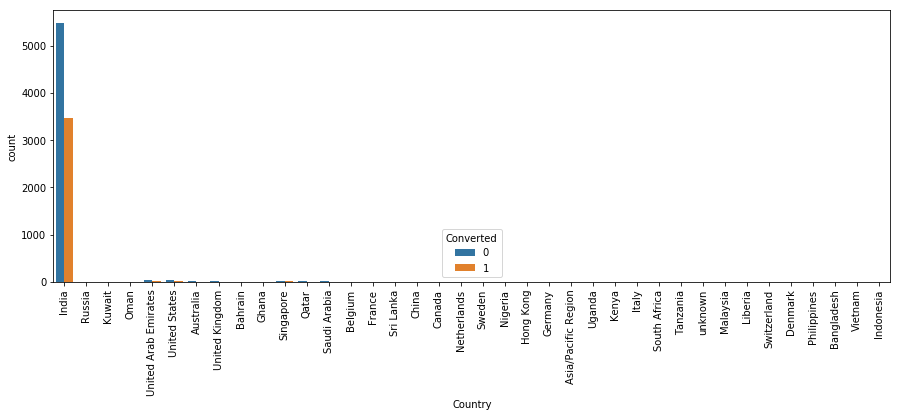

In [16]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Country, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [17]:
cols_to_drop=['Country']

In [18]:
lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
lead_data['City'] = lead_data['City'].replace(np.nan,'Mumbai')

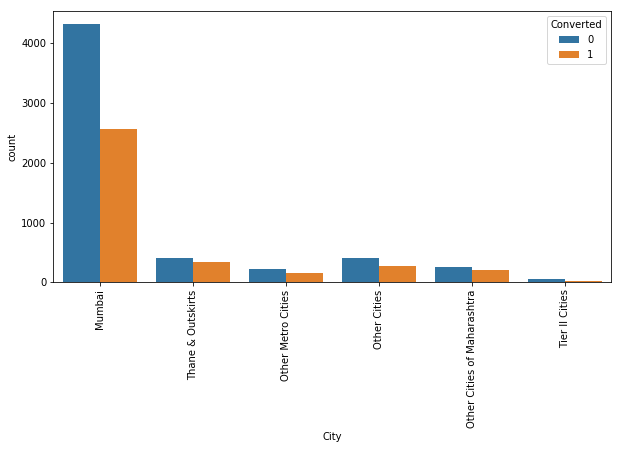

In [20]:

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.City, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#checking value counts of Specialization column

lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Not Specified')

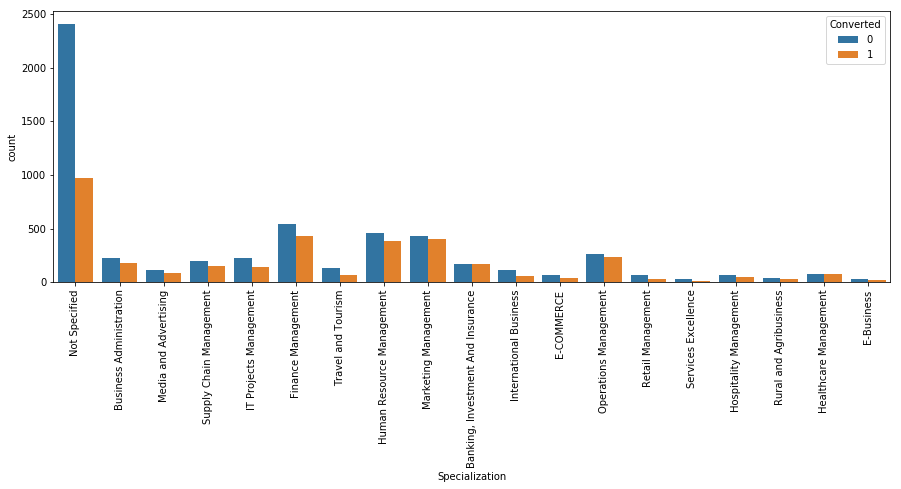

In [23]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

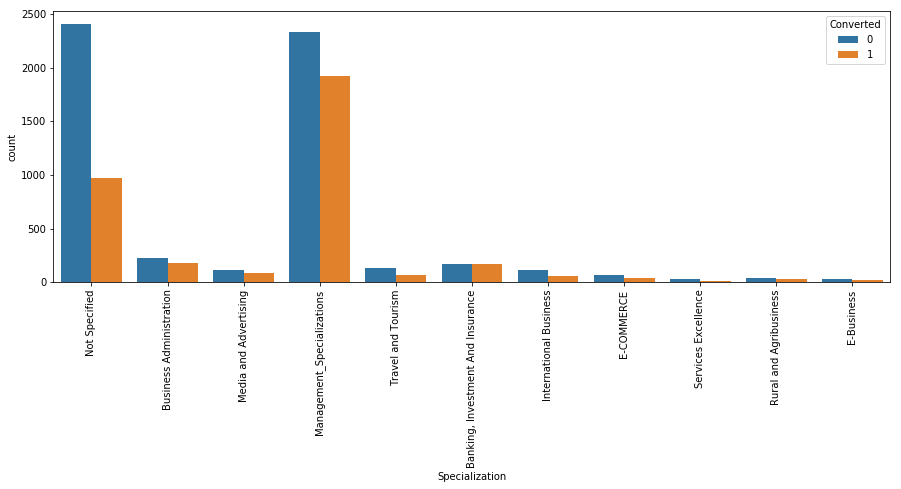

In [25]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:

lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')


In [28]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

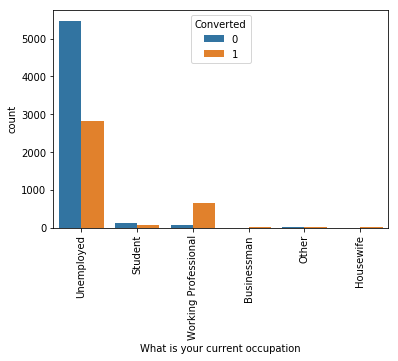

In [29]:
s1=sns.countplot(lead_data['What is your current occupation'], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:

lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

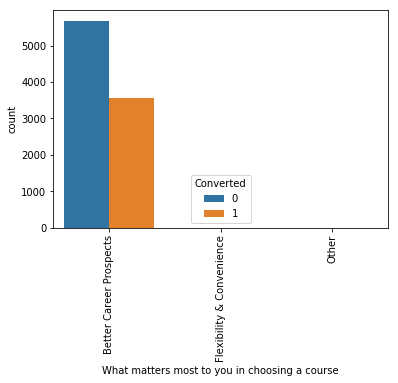

In [32]:

s1=sns.countplot(lead_data['What matters most to you in choosing a course'], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [35]:
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
#replacing Nan values with "Not Specified"
lead_data['Tags'] = lead_data['Tags'].replace(np.nan,'Not Specified')

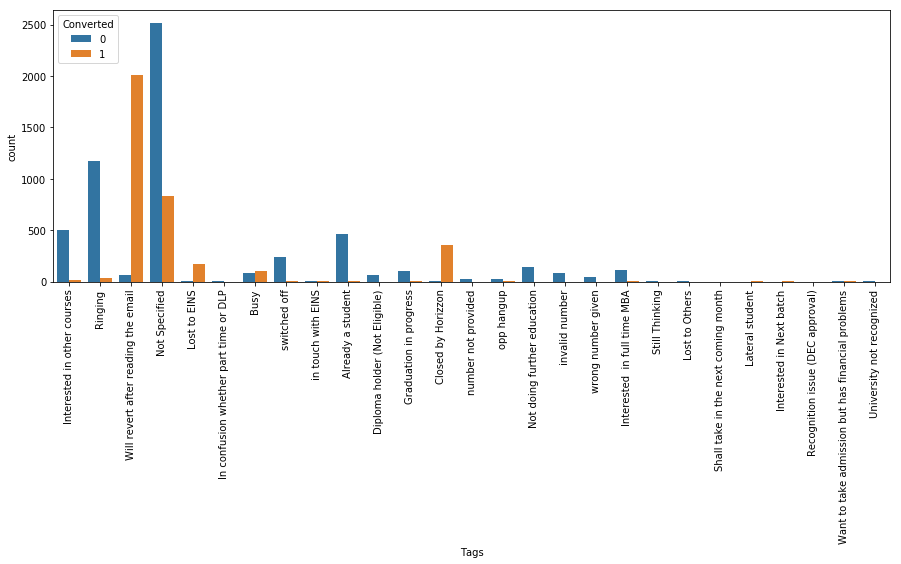

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data['Tags'], hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead_data['Tags'] = lead_data['Tags'].replace(['switched off','Already a student','Not doing further education','invalid number', 'wrong number given', 'Interested  in full time MBA'] , 'Other_Tags')

In [39]:
#checking percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [40]:

lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [41]:
#replacing Nan Values and combining low frequency values
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Others')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Facebook','Social Media')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

In [42]:

lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Others')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',  'Approached upfront',
                                                        'View in browser link Clicked','Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails', 'Visited Booth in Tradeshow'],'Others')

In [44]:

lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [45]:
#Check the Null Values in All Columns:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
lead_data = lead_data.dropna()

In [47]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [48]:
#Lead Origin
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [49]:
#checking value counts for Do Not Call
lead_data['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [50]:
#checking value counts for Do Not Email
lead_data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [51]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [52]:
lead_data.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [53]:
#checking value counts of last Notable Activity
lead_data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [54]:

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                         'Unsubscribed', 'Email Bounced', 'Resubscribed to emails',
                                                                       'View in browser link Clicked', 'Approached upfront', 
                                                                       'Form Submitted on Website','Email Received'],'Other_Notable_activity')


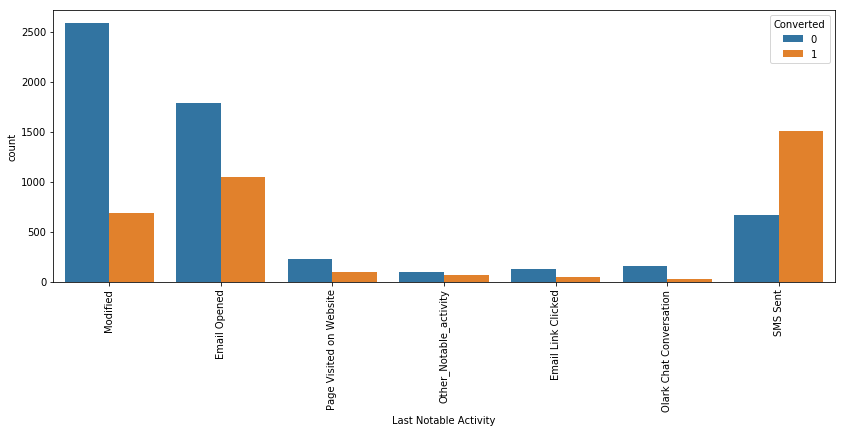

In [55]:

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [56]:

lead_data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [57]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [58]:
#dropping columns
lead_data = lead_data.drop(cols_to_drop,1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Do Not Call                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Tags                                      9103 non-null object
City                                      9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
Last Notabl

In [59]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100\


In [60]:
Converted

38.02043282434362

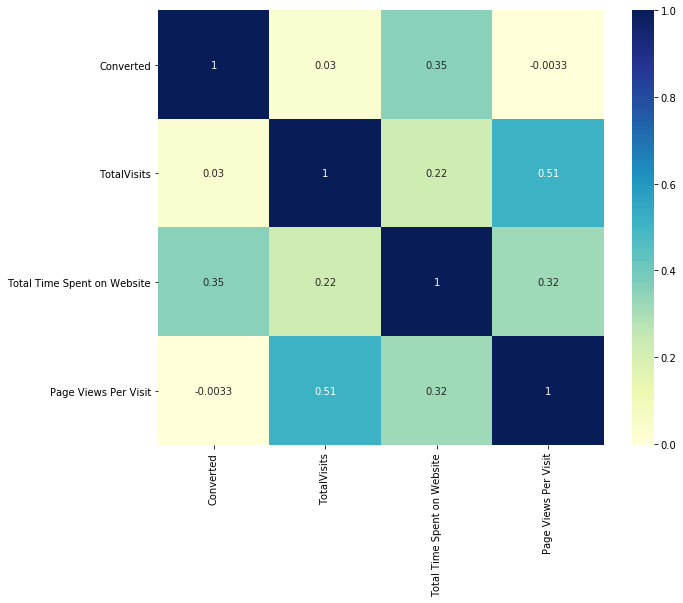

In [61]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [62]:
lead_data['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

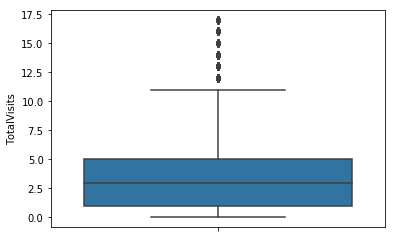

In [63]:
Q3=lead_data.TotalVisits.quantile(0.99)
lead_data=lead_data[(lead_data.TotalVisits <=Q3)]
Q1= lead_data.TotalVisits.quantile(0.01)
lead_data=lead_data[(lead_data.TotalVisits >=Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()


In [64]:
lead_data.shape

(9020, 15)

In [65]:
lead_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25,.50,.75,.90,.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

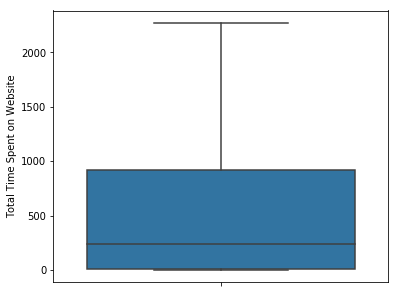

In [66]:
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

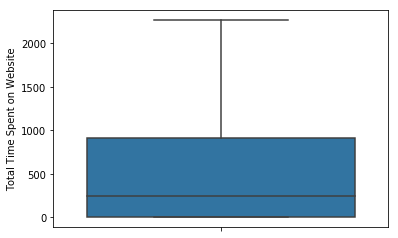

In [67]:

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

In [68]:
lead_data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

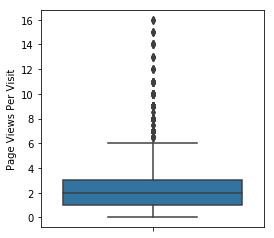

In [69]:

plt.figure(figsize=(4,4))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

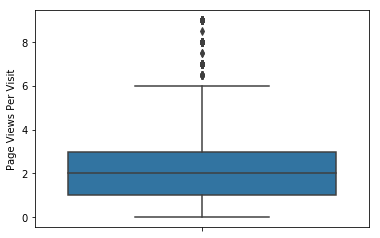

In [70]:

Q3 = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data['Page Views Per Visit'] <= Q3]
Q1 = lead_data['Page Views Per Visit'].quantile(0.01)
lead_data = lead_data[lead_data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [71]:
lead_data.shape

(8953, 15)

In [72]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

***creation of dummy variable*** 

In [73]:
#the list of categorical columns
cat_cols=lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [74]:
varlist = ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [75]:
dummy = pd.get_dummies(lead_data[['Lead Origin','What is your current occupation','City']], drop_first=True)
lead_data = pd.concat([lead_data,dummy],1)

#specialization
dummy=pd.get_dummies(lead_data['Specialization'],prefix='Specialization')
dummy=dummy.drop(['Specialization_Not Specified'],1)
lead_data = pd.concat([lead_data , dummy],axis=1)

#lead source
dummy=pd.get_dummies(lead_data['Lead Source'],prefix='Lead Source')
dummy=dummy.drop(['Lead Source_Others'],1)
lead_data=pd.concat([lead_data,dummy],axis=1)

#lead activity
dummy = pd.get_dummies(lead_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)

#last notable activity
dummy = pd.get_dummies(lead_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)

#tags
dummy=pd.get_dummies(lead_data['Tags'],prefix='Tags')
dummy=dummy.drop(['Tags_Not Specified'],1)
lead_data=pd.concat([lead_data,dummy],axis=1)


In [76]:
lead_data.drop(cat_cols,1,inplace=True)

In [77]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_data['Converted']

y.head()

X=lead_data.drop('Converted', axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
TotalVisits                                             6267 non-null float64
Total Time Spent on Website                             6267 non-null int64
Page Views Per Visit                                    6267 non-null float64
Lead Origin_Landing Page Submission                     6267 non-null uint8
Lead Origin_Lead Add Form                               6267 non-null uint8
Lead Origin_Lead Import                                 6267 non-null uint8
What is your current occupation_Housewife               6267 non-null uint8
What is your current occupation_Other                   6267 non-null uint8
What is your current occupation_Student                 6267 non-null uint8
What is your current occupation_Unemployed              6267 non-null uint8
What is your current occupation_Working Professional    6267 non-null uint8
City_Other Cities                                 

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

C:\Users\Pujitha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pujitha\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [82]:
import statsmodels.api as sm

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [85]:
list(zip(X_train.columns,rfe.support_ ,rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 30),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [86]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [88]:
#BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 12 May 2020   Deviance:                       2509.3
Time:                        15:23:02   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [89]:
#p value is high in lead source rferral sites
col = col.drop('Lead Source_Referral Sites',1)


In [90]:
#BUILDING MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Tue, 12 May 2020   Deviance:                       2510.7
Time:                        15:23:02   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.295345
4696    0.032852
3274    0.617801
2164    0.007975
1667    0.987238
7024    0.120820
8018    0.024302
778     0.139180
6942    0.003322
4440    0.089262
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29534528, 0.03285235, 0.6178014 , 0.00797479, 0.98723783,
       0.12082046, 0.02430221, 0.13918024, 0.00332173, 0.08926236])

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.295345,9196
1,0,0.032852,4696
2,0,0.617801,3274
3,0,0.007975,2164
4,1,0.987238,1667


In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.295345,9196,0
1,0,0.032852,4696,0
2,0,0.617801,3274,1
3,0,0.007975,2164,0
4,1,0.987238,1667,1


In [95]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3701  181]
 [ 286 2099]]


In [96]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9254826870911121


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
TP / float(TP+FN)

0.880083857442348

In [99]:
TN / float(TN+FP)

0.9533745492014426

In [100]:
print(FP/ float(TN+FP))

0.04662545079855744


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.9206140350877193


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.928266867318786


In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

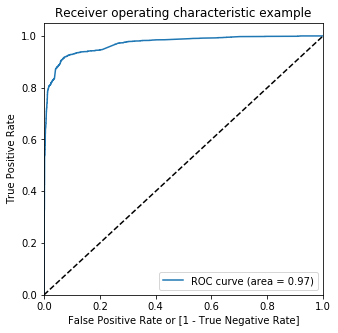

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [106]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.295345,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.032852,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.617801,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.007975,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987238,1667,1,1,1,1,1,1,1,1,1,1,1


In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.819531  0.973166  0.725142
0.2   0.2  0.908728  0.929979  0.895672
0.3   0.3  0.923408  0.916981  0.927357
0.4   0.4  0.925164  0.898952  0.941267
0.5   0.5  0.925483  0.880084  0.953375
0.6   0.6  0.915111  0.830189  0.967285
0.7   0.7  0.914792  0.810482  0.978877
0.8   0.8  0.910962  0.786583  0.987378
0.9   0.9  0.889102  0.724528  0.990211


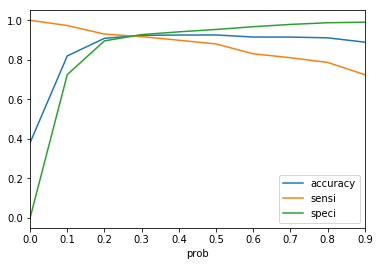

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.295345,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.032852,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.617801,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.007975,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.987238,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.295345,9196,0,30
1,0,0.032852,4696,0,3
2,0,0.617801,3274,1,62
3,0,0.007975,2164,0,1
4,1,0.987238,1667,1,99


In [112]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9234083293441838

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3600,  282],
       [ 198, 2187]], dtype=int64)

In [132]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9206140350877193

In [133]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.880083857442348

In [134]:
from sklearn.metrics import precision_score, recall_score

In [135]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8857837181044957

In [136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [114]:
#  sensitivity of logistic regression model
TP / float(TP+FN)a

0.880083857442348

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9533745492014426

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

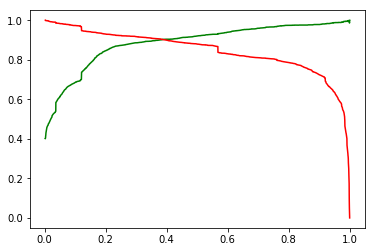

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,0,1


In [148]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,0,1


In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

7681    0.025895
984     0.015191
8135    0.723450
6915    0.004734
2712    0.944942
244     0.002817
4698    0.012590
8287    0.036213
6791    0.978399
8970    0.007065
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
y_pred_1.head()

,0
7681,0.025895
984,0.015191
8135,0.723450
6915,0.004734
2712,0.944942


In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
y_test_df['Prospect ID'] = y_test_df.index

In [156]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.025895
1,0,984,0.015191
2,0,8135,0.723450
3,0,6915,0.004734
4,1,2712,0.944942


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [160]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.025895
1,0,984,0.015191
2,0,8135,0.723450
3,0,6915,0.004734
4,1,2712,0.944942


In [161]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [162]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.025895,3
1,984,0,0.015191,2
2,8135,0,0.723450,72
3,6915,0,0.004734,0
4,2712,1,0.944942,94


In [163]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [164]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.025895,3,0
1,984,0,0.015191,2,0
2,8135,0,0.723450,72,1
3,6915,0,0.004734,0,0
4,2712,1,0.944942,94,1


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.926656738644825

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2


array([[1564,  112],
       [  85,  925]], dtype=int64)

In [167]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.880083857442348

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9533745492014426

In [169]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8919961427193829

In [170]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9158415841584159

the accuracy of training data is 92.29 and test data is 92.78 so the model seems to predict the conversion rate well and to give the CEO confidence in making good calls

1.	Which are the top three variables in your model that contribute most towards the probability of a lead getting converted?

Answer: 

The features used to build the model have been represented below based on their importance in lead conversion as per their coefficient values.
  As per the  jupyter notebook result, the top 3 variables that contribute most  towards the probability of a lead getting converted are:

1.	Tags_Lost to EINS
2.	Tags_Closed by Horizzon
3.	Tags_Will revert after reading the email


2.What are the top 3 categorical/dummy variables in the model which get maximum focus in order to increase the probability of lead conversion?

Answer:
As per the above diagram, the top 3 categorical/dummy variables that contribute the most towards the probability of a lead getting converted are also :

1.	Tags_Lost to EINS
2.	Tags_Closed by Horizzon
3.	Tags_Will revert after reading the email



3.	3.X Education has a period of 2 months every year during which they hire few interns. The sales team, in particular, has around 10 interns allotted to them. So, during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

Ans: 

Sensitivity with respect to our model can be defined as the ratio of total number of actual Conversions correctly predicted to the total no of actual Conversions.

Similarly, Specificity can be defined as the ratio of total no of actual non-Conversions correctly predicted to the total number of actual non-Conversions.

For a particular model, as one increases, the other decreases and vice versa.
Different values of the sensitivity and specificity can be achieved for the same model by changing the Conversion Probability cutoff threshold value.

For our model, the below graph shows how the Sensitivity and Specificity rating changes with change in the threshold value
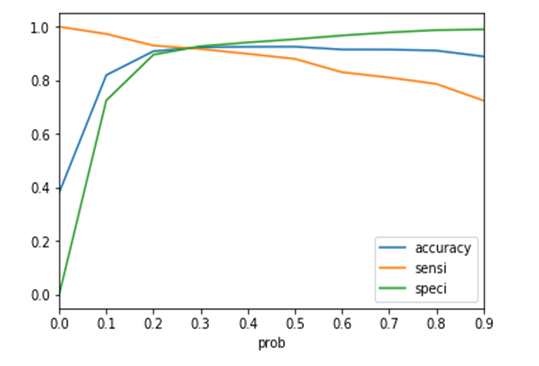

 

When the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high.

High sensitivity implies that our model will correctly identify almost all leads who are likely to Convert. It will do that by over-estimating the Conversion likelihood, i.e. it will misclassify some non-Conversion cases as Conversions. 

Now, since X Education has more man-power for these 2 months and they wish to make the lead conversion more aggressive by wanting almost all of the potential leads, we can choose a lower threshold value for Conversion Probability. 

This will ensure the Sensitivity rating is very high which in turn will make sure almost all leads who are likely to Convert are identified correctly and the agents can make phone calls to as much of such people as possible.




4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

Answer:

Following the similar logic and context from the previous question, High Specificity implies that our model will correctly identify almost all leads who are not likely to Convert. It will do that at the cost of losing out some low Conversion rate risky leads to the competition, i.e. it will misclassify some Conversion cases as non-Conversions.

Therefore, since X Education has already reached its target for a quarter and doesn’t want to make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls, we can choose a higher threshold value for Conversion Probability. 

This will ensure the Specificity rating is very high, which in turn will make sure almost all leads who are on the brink of the probability of getting Converted or not are not selected. As a result the agents won’t have to make unnecessary phone calls and can focus on some new work.


